In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import arviz as az
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

w=pd.read_csv("1950-2020_all_tornadoes.csv")

x=np.linspace(1,366,366)

year={}
year['1']=0
year['2']=31
year['3']=59
year['4']=90
year['5']=120
year['6']=151
year['7']=181
year['8']=212
year['9']=243
year['10']=273
year['11']=304
year['12']=334

Text(0, 0.5, 'Amount of tornadoes')

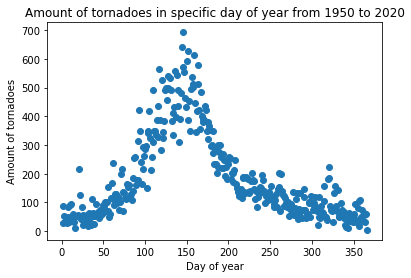

In [2]:
tornadoes=np.zeros([366])
for i in range(len(w['mo'])):
    day=int(w['dy'][i])
    month=str(w['mo'][i])
    mm=year[month]
    ww=day+mm
    if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
        ww=ww+1
    tornadoes[ww-1]=tornadoes[ww-1]+1
    
plt.plot(x,tornadoes,'o')
plt.title("Amount of tornadoes in specific day of year from 1950 to 2020")
plt.xlabel('Day of year')
plt.ylabel('Amount of tornadoes')

Text(0, 0.5, 'Amount of days when tornado occurred')

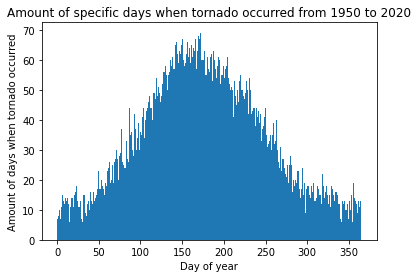

In [3]:
lista=[]
days=[]

for i in range(len(w['mo'])):
    if w['date'][i] not in lista:
        lista.append(w['date'][i])
        day=int(w['dy'][i])
        month=str(w['mo'][i])
        mm=year[month]
        ww=day+mm
        if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
            ww=ww+1
        days.append(ww-1)
        if ww==366:
            days.append(ww-1)
            days.append(ww-1)
            days.append(ww-1)
plt.hist(days,bins=366)
plt.title("Amount of specific days when tornado occurred from 1950 to 2020")
plt.xlabel('Day of year')
plt.ylabel('Amount of days when tornado occurred')

In [4]:
model1_ppc=CmdStanModel(stan_file='model1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
data=dict(N=366,torns=tornadoes,alpha=,beta=)
m1=model1_ppc.sample(iter_sampling=12124,chains=1,fixed_param=True)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'sigma')

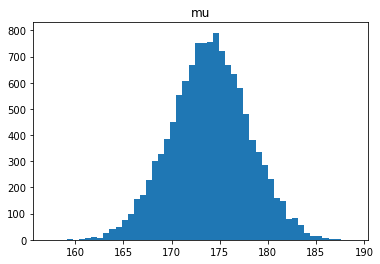

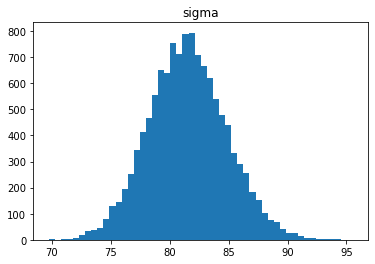

In [6]:
mu1=m1.stan_variable('mu')
sigma1=m1.stan_variable('sigma')
prob1=m1.stan_variable('prob')

plt.hist(mu1,bins=50)[2]
plt.title("mu")
plt.figure()
plt.hist(sigma1,bins=50)[2]
plt.title("sigma")

Text(0.5, 1.0, 'Comparison between real data and generated data')

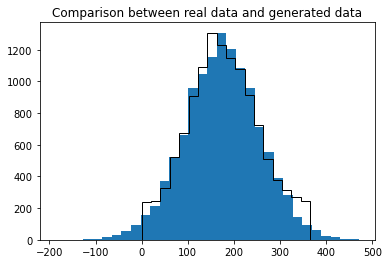

In [7]:
a=max(prob1)
b=min(prob1)

plt.hist(prob1,bins=int((a-b)/20))[2]
plt.hist(days,bins=int(366/20),histtype='step',color='black')[2]
plt.title("Comparison between real data and generated data")

In [11]:
model1_fit=CmdStanModel(stan_file='model1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
data=dict(N=len(days),probs=days)
m2=model1_fit.sample(data=data,iter_sampling=len(days),chains=1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'sigma')

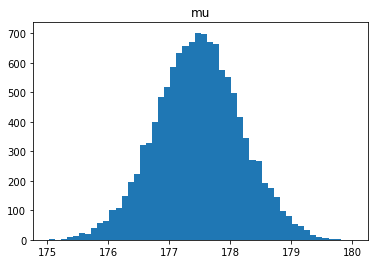

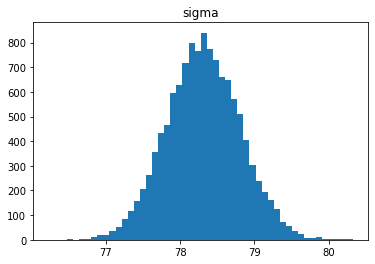

In [10]:
mu2=m2.stan_variable('mu')
sigma2=m2.stan_variable('sigma')
prob2=m2.stan_variable('prob')

plt.hist(mu2,bins=50)[2]
plt.title("mu")
plt.figure()
plt.hist(sigma2,bins=50)[2]
plt.title("sigma")

Text(0.5, 1.0, 'Comparison between real data and generated data from model')

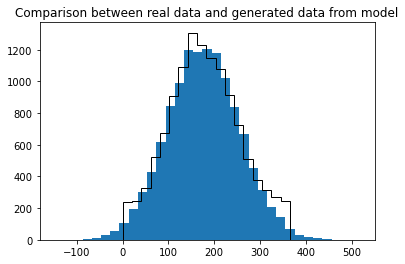

In [11]:
a=max(prob2)
b=min(prob2)

plt.hist(prob2,bins=int((a-b)/20))[2]
plt.hist(days,bins=int(366/20),histtype='step',color='black')[2]
plt.title("Comparison between real data and generated data from model")


In [12]:
model2_ppc=CmdStanModel(stan_file='model2_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [13]:
data=dict(mu1=2.7,sigma1=0.1)
m3=model2_ppc.sample(data=data,iter_sampling=12124,chains=1,fixed_param=True)


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'nu')

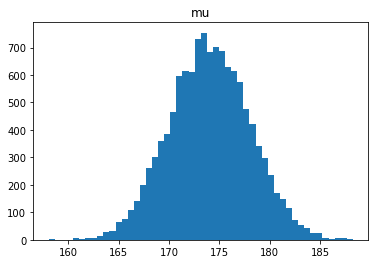

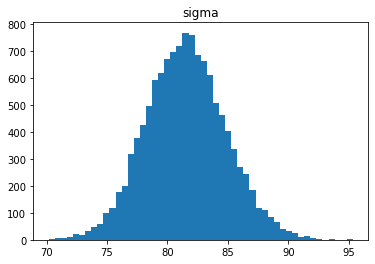

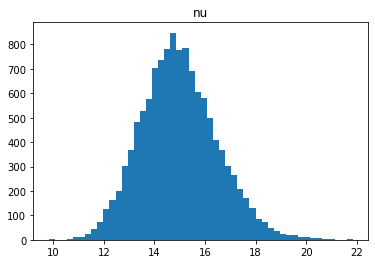

In [14]:
prob3=m3.stan_variable('prob')
mu3=m3.stan_variable('mu')
sigma3=m3.stan_variable('sigma')
nu3=m3.stan_variable('nu')

plt.hist(mu3,bins=50)[2]
plt.title("mu")
plt.figure()
plt.hist(sigma3,bins=50)[2]
plt.title("sigma")
plt.figure()
plt.hist(nu3,bins=50)[2]
plt.title("nu")

Text(0.5, 1.0, 'Comparison between real data and generated data')

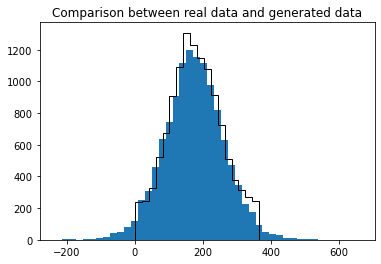

In [15]:
a=max(prob3)
b=min(prob3)

plt.hist(prob3,bins=int((a-b)/20))[2]
plt.hist(days,bins=int(366/20),histtype='step',color='black')[2]
plt.title('Comparison between real data and generated data')


In [4]:
model2_fit=CmdStanModel(stan_file='model2_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Emperor\model2_fit.stan to exe file C:\Users\Emperor\model2_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\model2_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/model2_fit.hpp C:/Users/Emperor/model2_fit.stan
Warning in 'C:/Users/Emperor/model2_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/

In [5]:
data4=dict(N=len(days),probs=days)
m4=model2_fit.sample(data=data4,iter_sampling=len(days),chains=1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'nu')

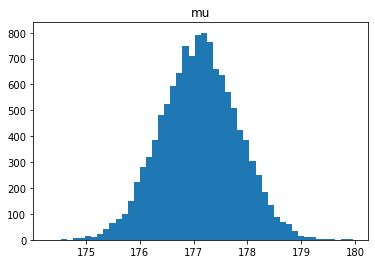

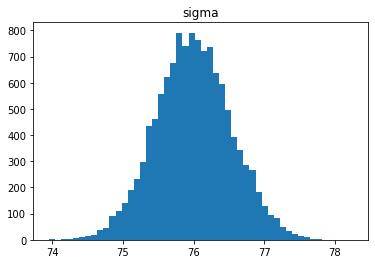

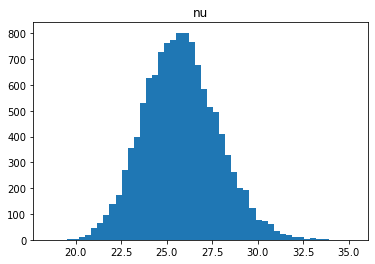

In [6]:
prob4=m4.stan_variable('prob')
mu4=m4.stan_variable('mu')
sigma4=m4.stan_variable('sigma')
nu4=m4.stan_variable('nu')

plt.hist(mu4,bins=50)[2]
plt.title("mu")
plt.figure()
plt.hist(sigma4,bins=50)[2]
plt.title("sigma")
plt.figure()
plt.hist(nu4,bins=50)[2]
plt.title("nu")

Text(0.5, 1.0, 'Comparison between real data and generated data from model')

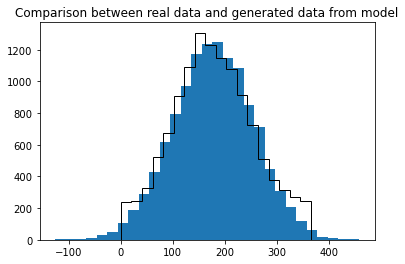

In [7]:
a=max(prob4)
b=min(prob4)

plt.hist(prob4,bins=int((a-b)/20))[2]
plt.hist(days,bins=int(366/20),histtype='step',color='black')[2]
plt.title("Comparison between real data and generated data from model")


In [20]:
az.loo(m2)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 12130 by 1.0 log-likelihood matrix

         Estimate       SE
elpd_loo -70094.60     0.00
p_loo        1.54        -

There has been a warning during the calculation. Please check the results.

In [8]:
az.loo(m4)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 12130 by 1.0 log-likelihood matrix

         Estimate       SE
elpd_loo -70153.57     0.00
p_loo       17.63        -

There has been a warning during the calculation. Please check the results.

In [22]:
az.waic(m2)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 12130 by 1.0 log-likelihood matrix

          Estimate       SE
elpd_waic -70094.06     0.00
p_waic        1.00        -

There has been a warning during the calculation. Please check the results.

In [9]:
az.waic(m4)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 12130 by 1.0 log-likelihood matrix

          Estimate       SE
elpd_waic -70154.93     0.00
p_waic       18.99        -

There has been a warning during the calculation. Please check the results.

In [13]:
com1=az.from_cmdstanpy(m2)
com2=az.from_cmdstanpy(m4)

w53=az.compare({"1":com1,"2":com2})
w53

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:724: UserWarning: The point-wise LOO is the same with the sum LOO, please double check the Observed RV in your model to make sure it returns element-wise logp.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the margin

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,-70094.689605,1.632213,0.000000,0.5,0.0,0.0,True,log
2,1,-70153.569420,17.633231,58.879814,0.5,0.0,0.0,True,log


<AxesSubplot:xlabel='Log'>

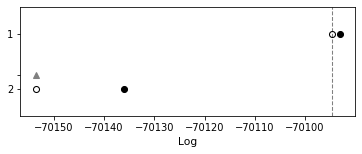

In [14]:
az.plot_compare(w53)